In [1]:
import json
import pandas as pd
import os
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
import seaborn
import numpy as np

[nltk_data] Downloading package punkt to C:\Users\Kshitij
[nltk_data]     Gundale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def get_text(data_path, dataset, label):
    all_text = []
    for news in os.listdir(path.join(data_path, dataset, label)):
        with open(path.join(data_path, dataset, label, news, f"{news}_text.txt"), encoding="utf-8") as f:
            text = f.read()
            if text:
                all_text.append(text)
    return all_text

def clean_text(s):
    s = s.lower()
    s = s.replace("\n", " ")
    s = re.sub('[^A-Za-z0-9 ]+', '', s)
    return s

def get_wordcloud(stopwords, dataset, label, data_path):

    all_text = get_text(data_path, dataset, label)
    all_text = [clean_text(s) for s in all_text]
    all_text = " ".join(all_text)

    wordcloud = WordCloud(
        width=1600, 
        stopwords=stopwords,
        height=800,
        max_font_size=200,
        max_words=50,
        collocations=False,
        background_color='black'
    ).generate(all_text)

    return wordcloud


In [14]:
data_path = "../preprocessed_data"
datasets = ['politifact', 'gossipcop']
labels = ['fake', 'real']

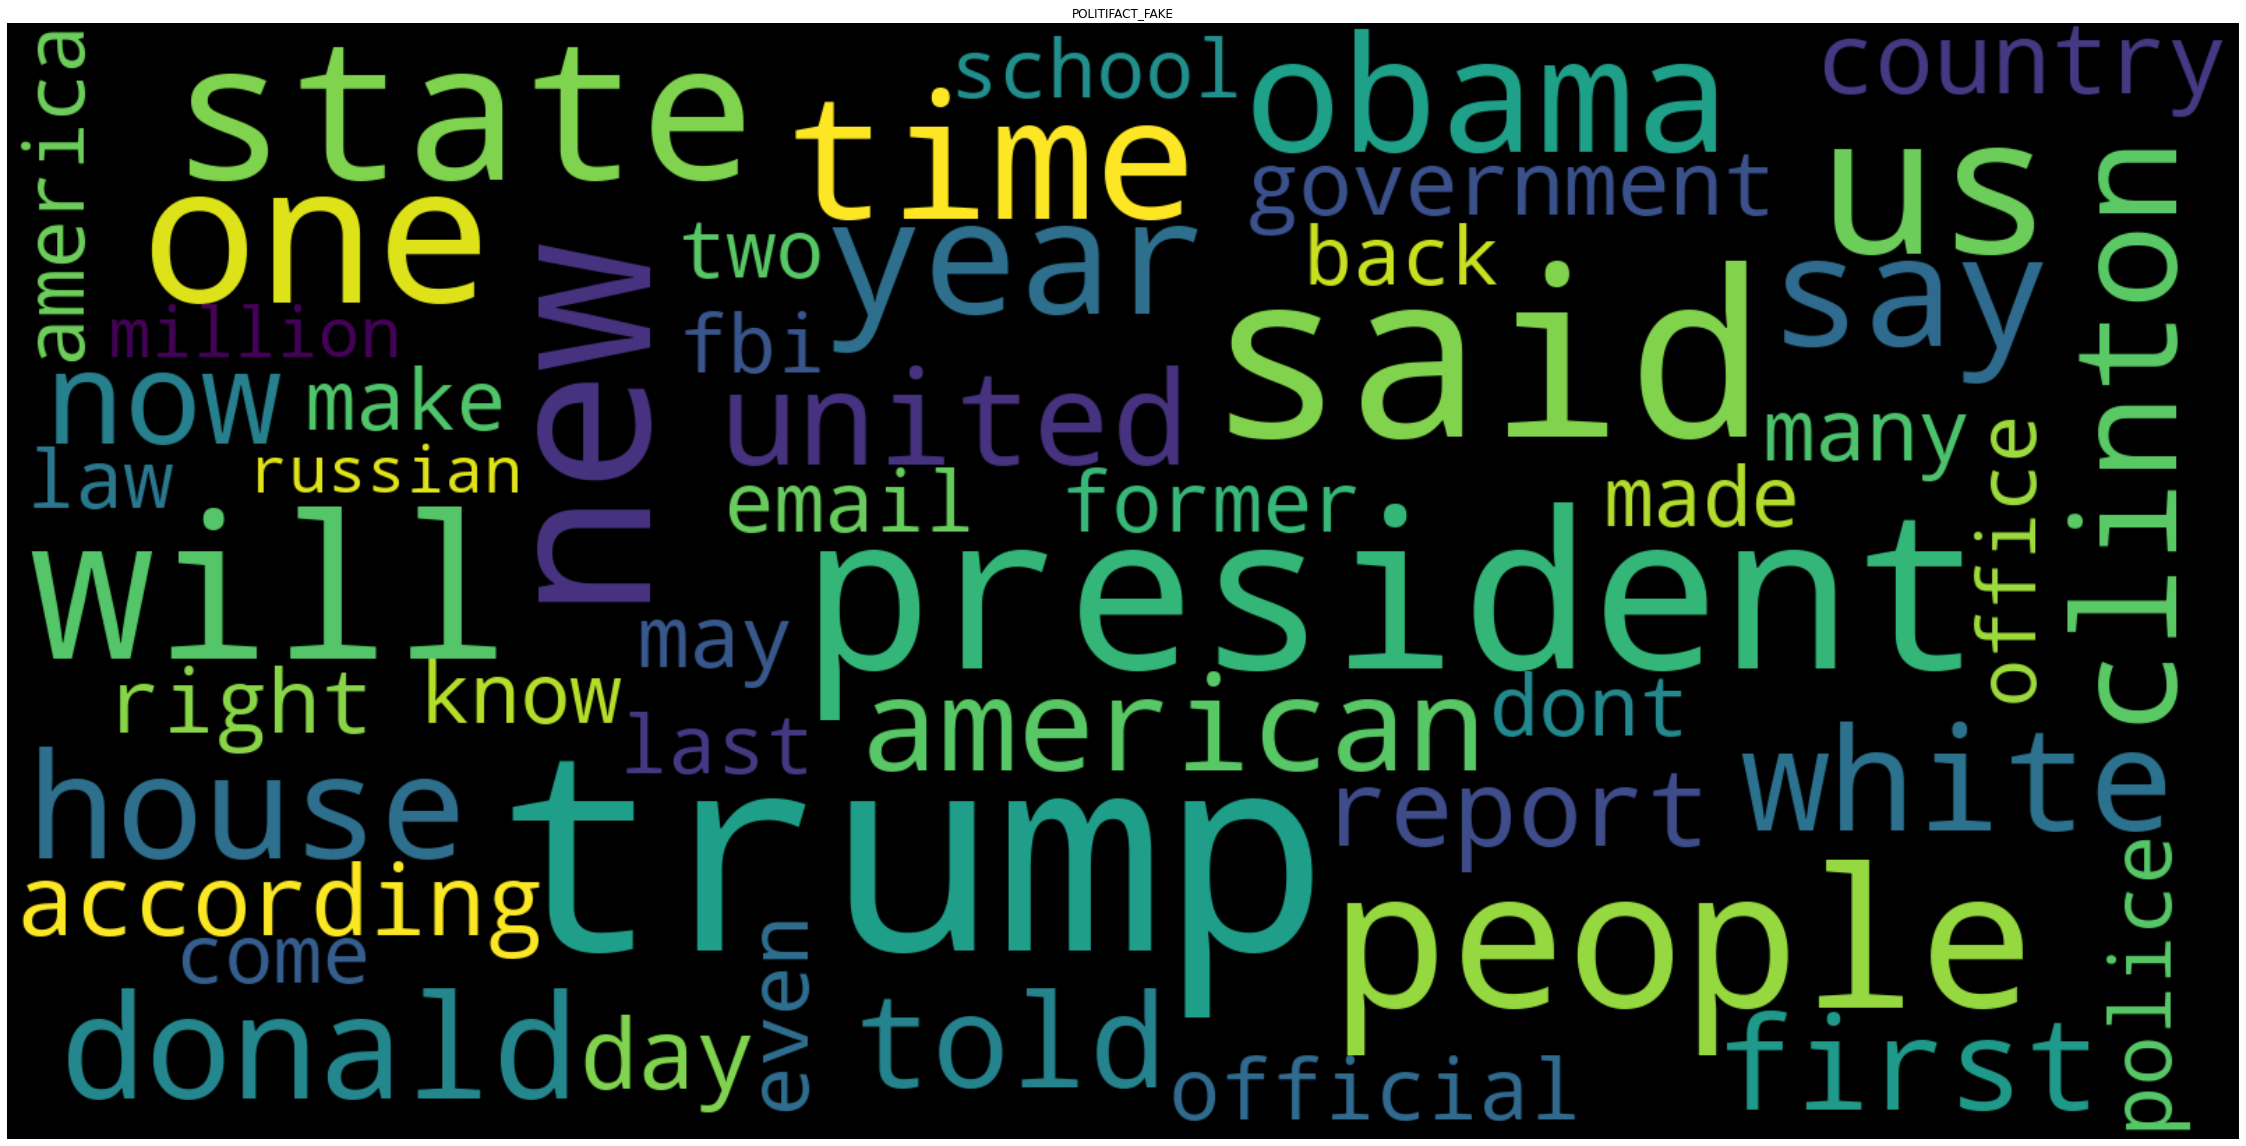

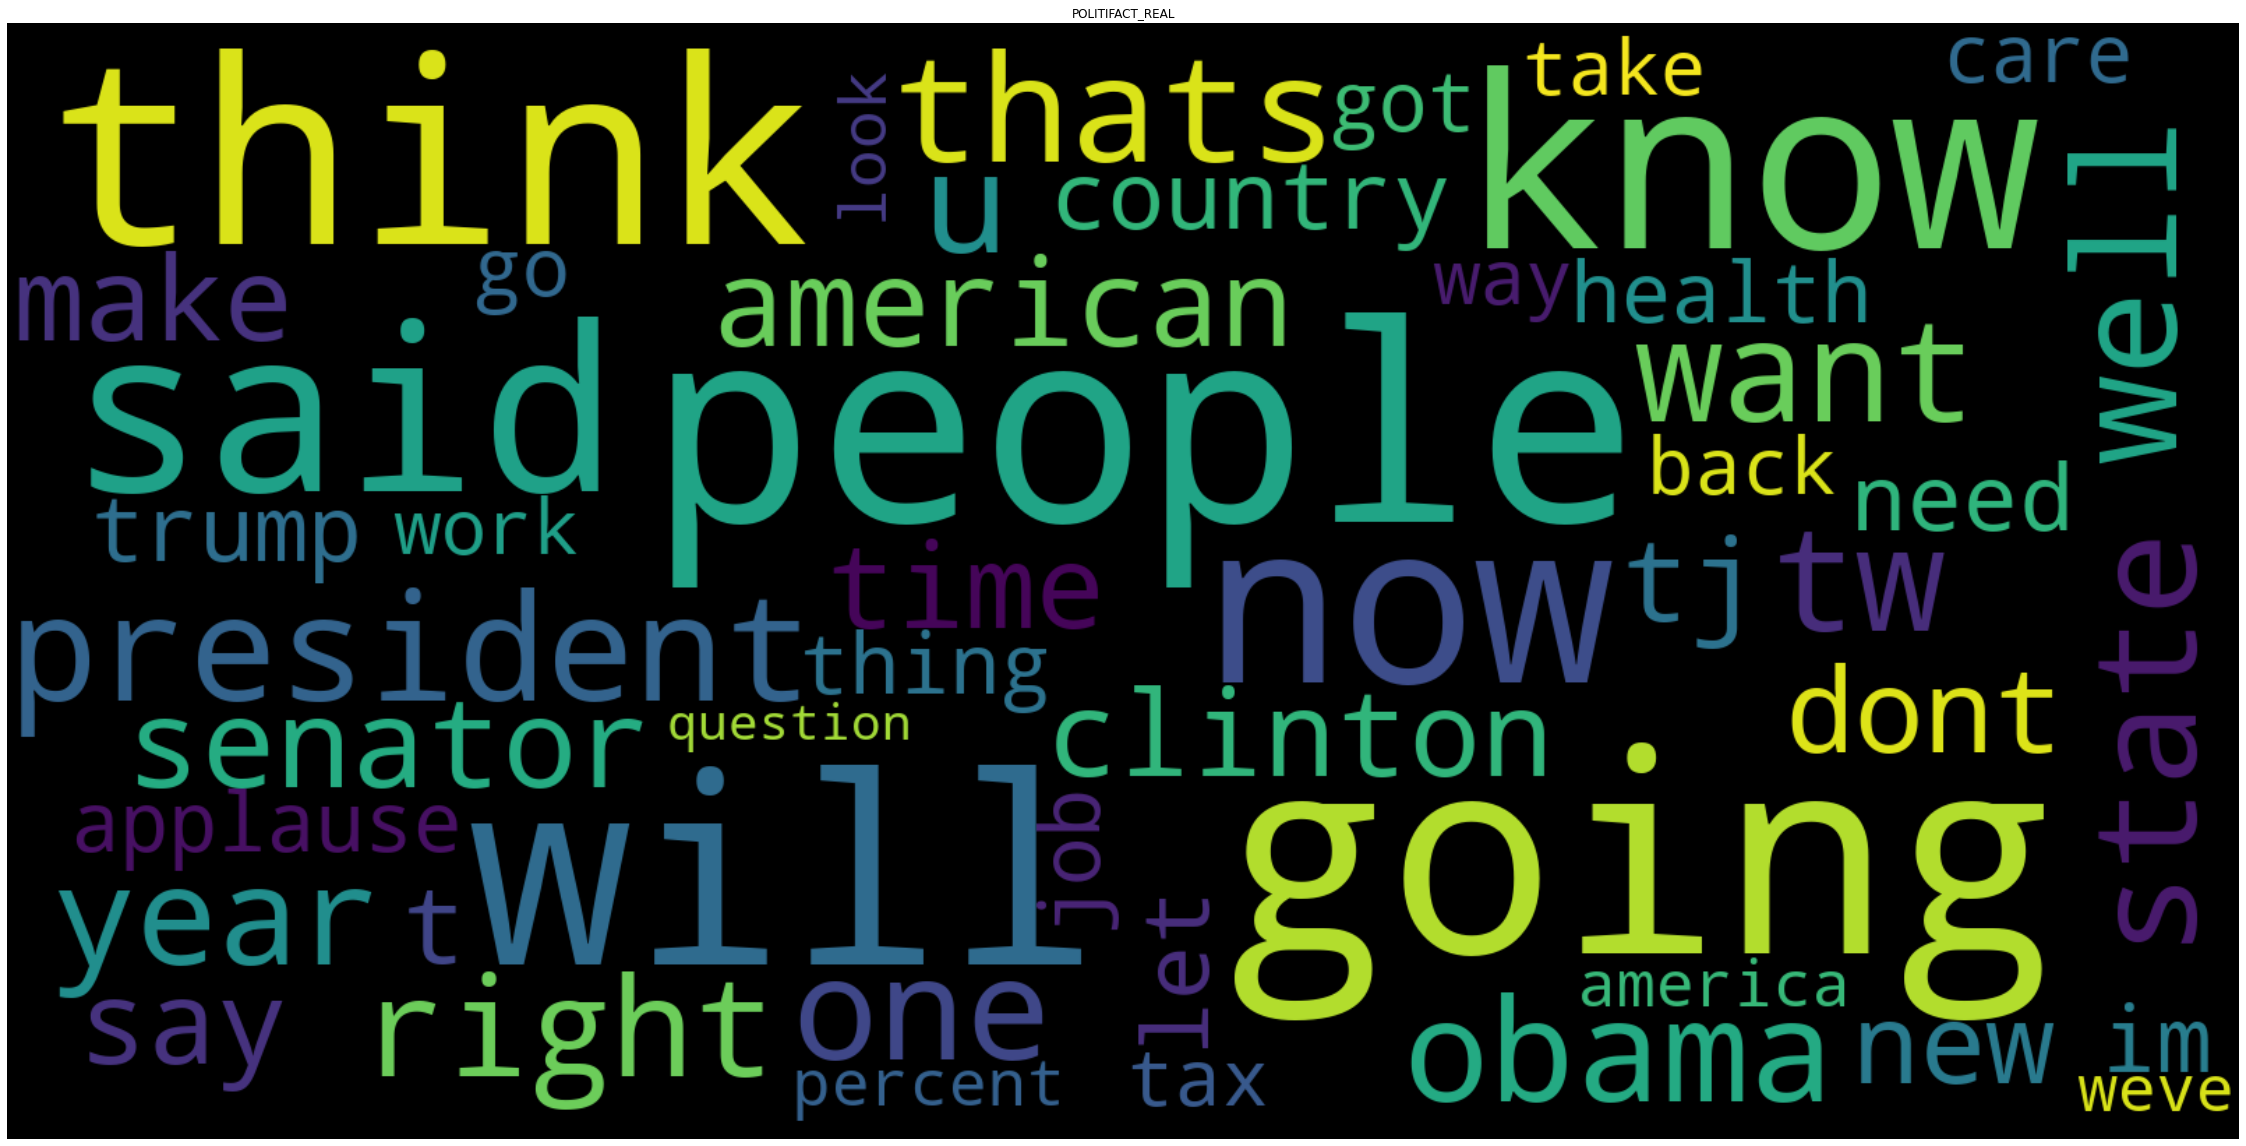

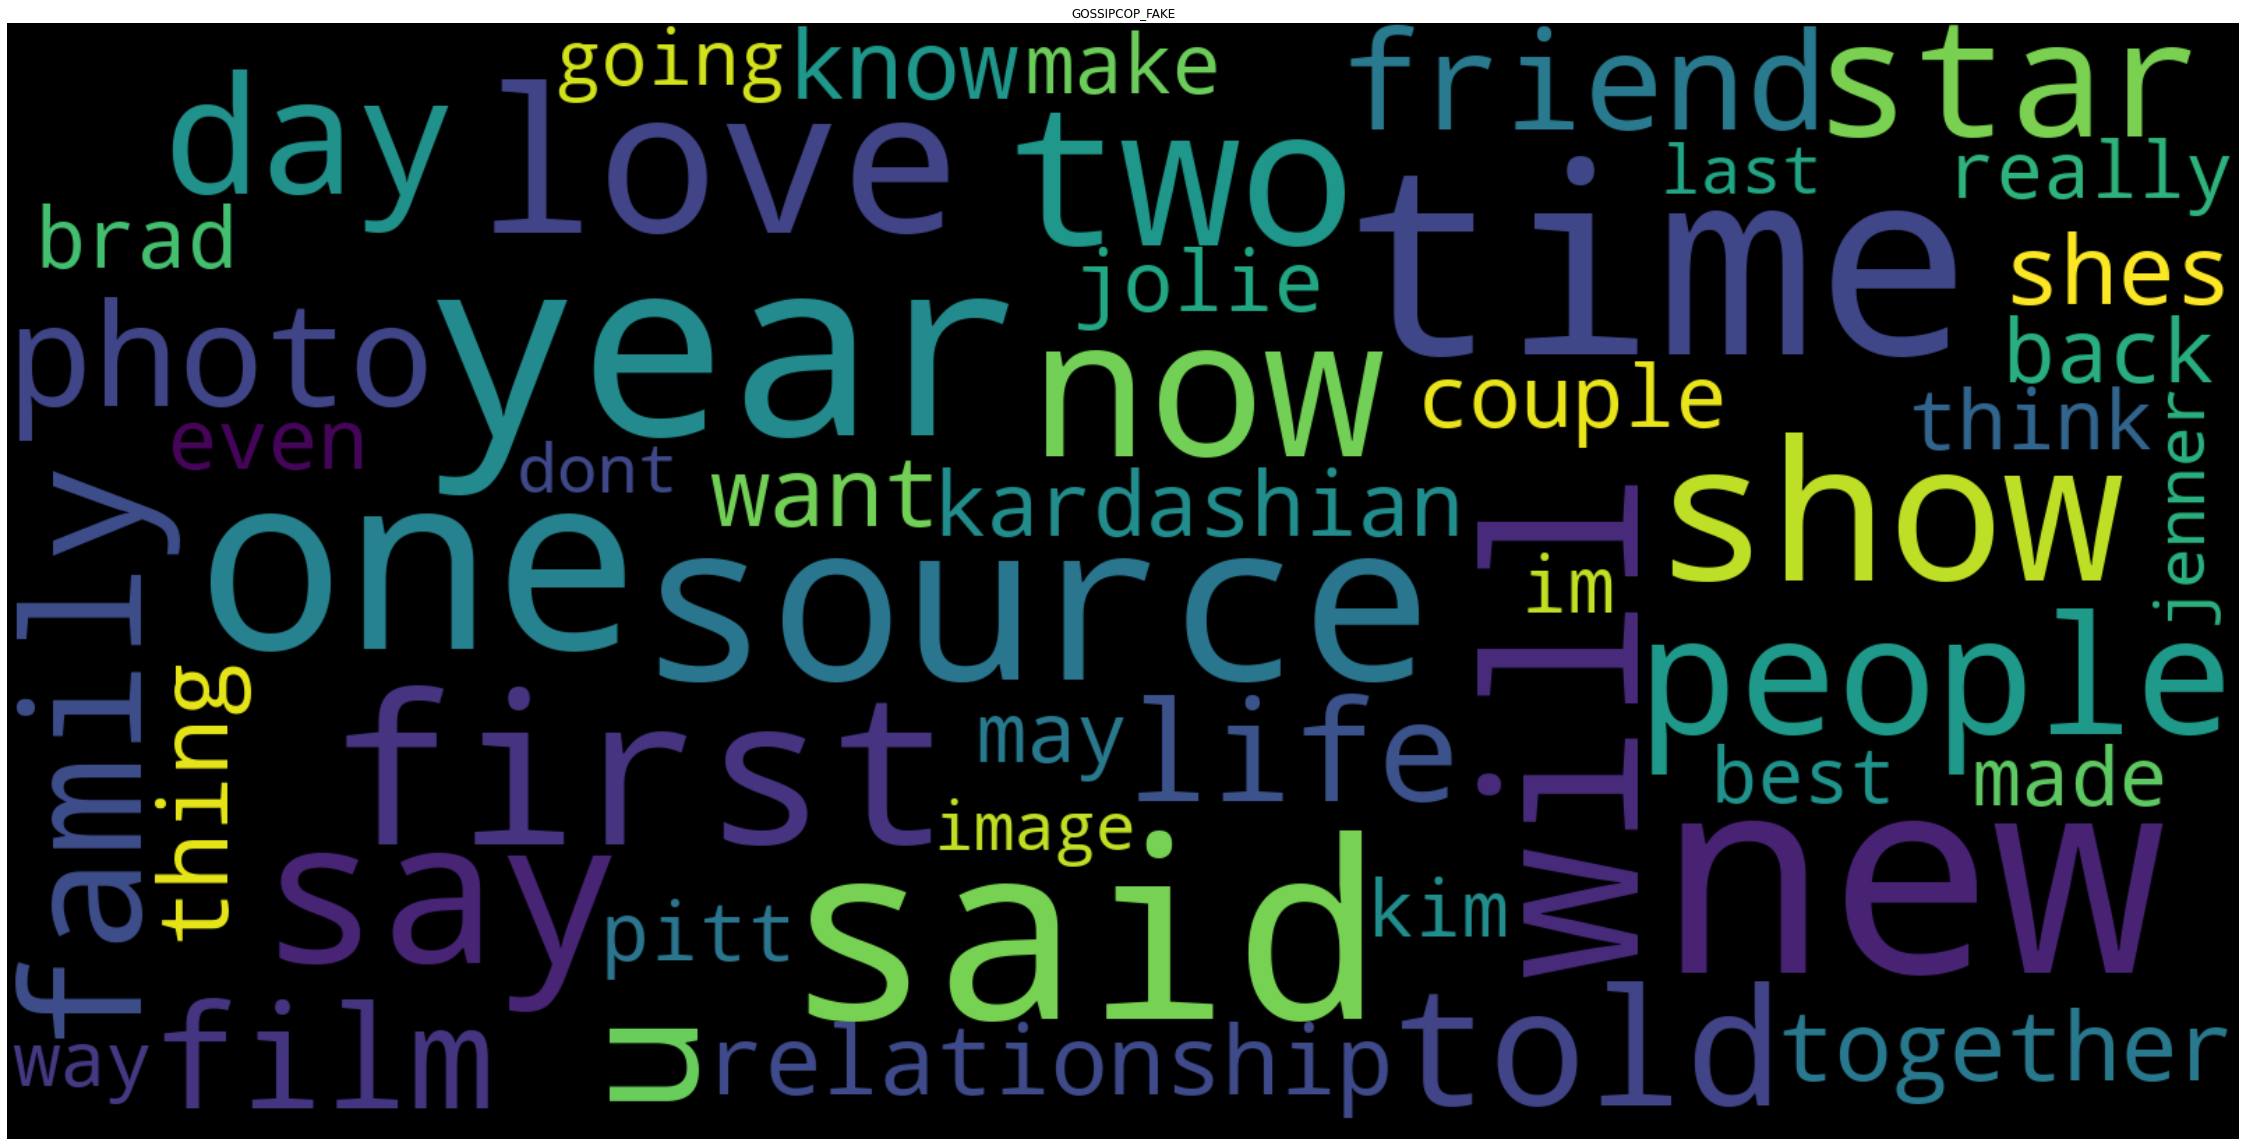

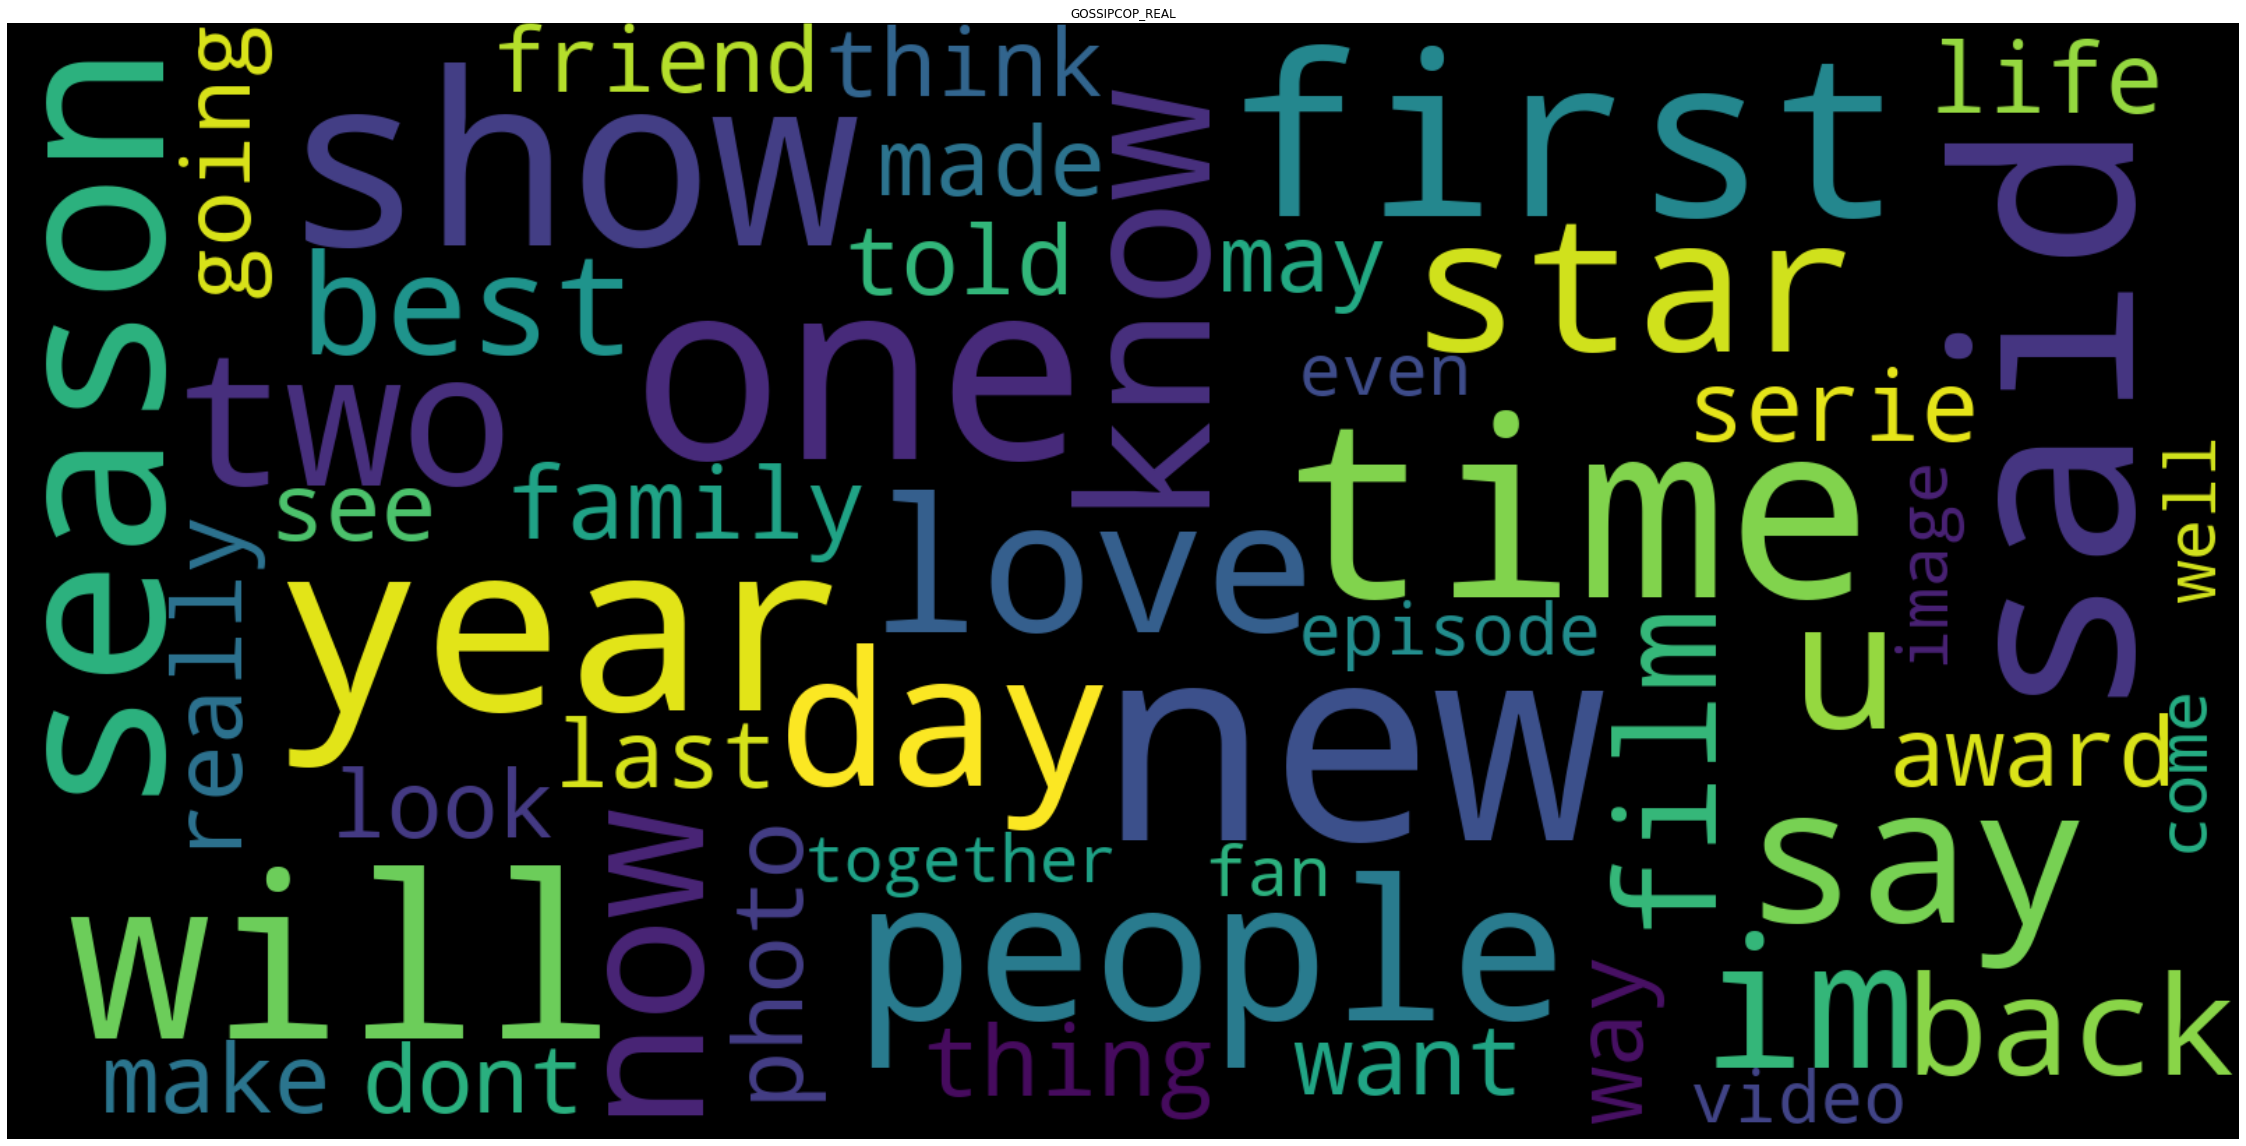

In [18]:
stopwords = set(STOPWORDS)

for dataset in datasets:
    for label in labels:
        wordcloud = get_wordcloud(stopwords, dataset, label, data_path)
        fig = plt.figure(figsize=(40,30))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{dataset.upper()}_{label.upper()}")
        plt.show()
        fig.savefig(f"../reports/wordclouds/{dataset}_{label}_wordcloud.png")

len > 512 in politifact : 0.36923076923076925
len > 512 in gossipcop : 0.2804799762974668


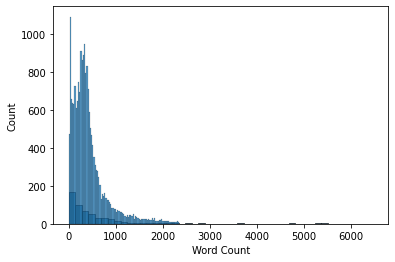

In [19]:
for dataset in datasets:
    text_tokens = []
    for label in labels:
        text = [clean_text(s) for s in get_text(data_path, dataset, label)]
        text_tokens.extend([nltk.tokenize.word_tokenize(s) for s in text])

    text_tokens_len = [len(l) for l in text_tokens]

    # Percentage of news article with length greater than transformer max length (512)
    print(f"len > 512 in {dataset} : {len([i for i in text_tokens_len if i > 512])/len(text_tokens_len)}")

    # Removing outliers 
    out_threshold= 2*np.std(text_tokens_len+[-a for a in text_tokens_len])
    text_tokens_len = [i for i in text_tokens_len if i<out_threshold]

    seaborn.histplot(text_tokens_len)
    plt.xlabel("Word Count")
    plt.ylabel("Count")
    plt.savefig(f"../reports/wordcounts/{dataset}_word_count.png")

141